__purpose__ : calculate global and SNP-wise FST for both coastal and interior Douglas-fir


__notebook outline__:
- __set up R magics__ - use R interactively with python to run `poolfstat` package in R
- __Run poolfstat__ - calculate FST for coastal and interior varieties, plot FST vs unordered snp index

In [1]:
from pythonimports import *

# set up R magics

In [2]:
latest_commit()

##################################################################
Current commit of pythonimports:
commit e9626ace46e74716aa8e80b76ba6467313f81da5
Author: Brandon <lindb@vcu.edu>
Date:   Thu Dec 31 14:17:15 2020 -0700
Today:	January 07, 2021 - 00:58:05
##################################################################



In [3]:
def setup_r(): 
    os.environ['R_HOME'] = '/lu213/brandon.lind/data/anaconda3/envs/r35/lib/R' 
    os.environ['LD_LIBRARY_PATH'] = "%s/lib:%s" % (os.environ['R_HOME'], 
                                                   os.environ['LD_LIBRARY_PATH'])
    pass

setup_r()

In [5]:
import readline
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri as pd2ri

pd2ri.activate()
r = robjects.r

%reload_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext rpy2.ipython
%matplotlib inline

In [6]:
%%R
source('~/mypy/r_imports/imports.R')
library(poolfstat)
sessionInfo()

R[write to console]: Loading required package: foreach

R[write to console]: Loading required package: doParallel

R[write to console]: Loading required package: iterators

R[write to console]: Loading required package: parallel



R version 3.5.1 (2018-07-02)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux

Matrix products: default
BLAS/LAPACK: /data/home/lindb/anaconda3/envs/py38/lib/libmkl_rt.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] parallel  tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] poolfstat_1.2.0   doParallel_1.0.16 iterators_1.0.13  foreach_1.5.1    

loaded via a namespace (and not attached):
[1] compiler_3.5.1   Rcpp_1.0.5       codetools_0.2-15


# Run poolfstat

## coastal

In [ ]:
baydir = '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/coastal_variety_with-p6/03_maf-p05_RD-recalculated_FDC/baypass'
fstdir = makedir(op.join(op.dirname(baydir), 'fst'))

In [7]:
%%R
# load baypass files created in yeaman03:/notebooks/002_doug_fir_gea/02_baypass
# these have already been appropriately filtered, so I'm not doing any filtering with the `genobaypass2pooldata` call
baydir <- '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/coastal_variety_with-p6/03_maf-p05_RD-recalculated_FDC/baypass'
pooldata <- genobaypass2pooldata(genobaypass.file = paste(baydir, 'coastal_all_snps_ADP-lt-1000_gfile_noheaderidx.txt', sep='/'),
                                 poolsize.file = paste(baydir, 'coastal_poolsizefile_noheaderidx.txt', sep='/'),
                                 poolnames = names(read.csv(paste(baydir, 'coastal_poolsizefile_HEADERIDX.txt', sep='/'), sep='\t')),
                                 min.cov.per.pool = -1,
                                 max.cov.per.pool = 1e+06,
                                 min.maf = -1,
                                 nlines.per.readblock = 3e+06)
saveRDS(pooldata, '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/coastal_variety_with-p6/03_maf-p05_RD-recalculated_FDC/fst/coastal_poolfstat.RDS')

2.2540110000000002088 millions lines processed in 1.7299999999999999822  min.;  2254011 SNPs found
Data consists of 2254011 SNPs for 38 Pools


In [7]:
%%R
# calculate FSTs
res.fst = computeFST(pooldata)

In [8]:
%%R
# data names within object
names(res.fst)

[1] "snp.FST" "snp.Q1"  "snp.Q2"  "FST"    


In [9]:
%%R
# global FST across pops
res.fst$FST

[1] 0.026488294348883952012


In [10]:
# pull FSTs from R into python
fsts = r('res.fst$snp.FST')

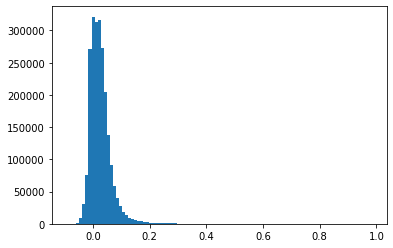

In [11]:
# all FSTs
plt.hist(fsts, bins=100)
plt.show()

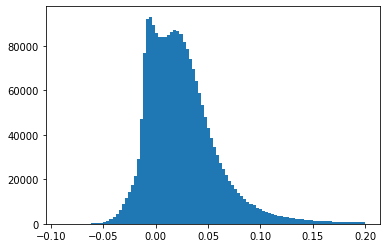

In [12]:
# FSTs < 0.2
plt.hist([x for x in fsts if x < 0.2], bins=100)
plt.show()

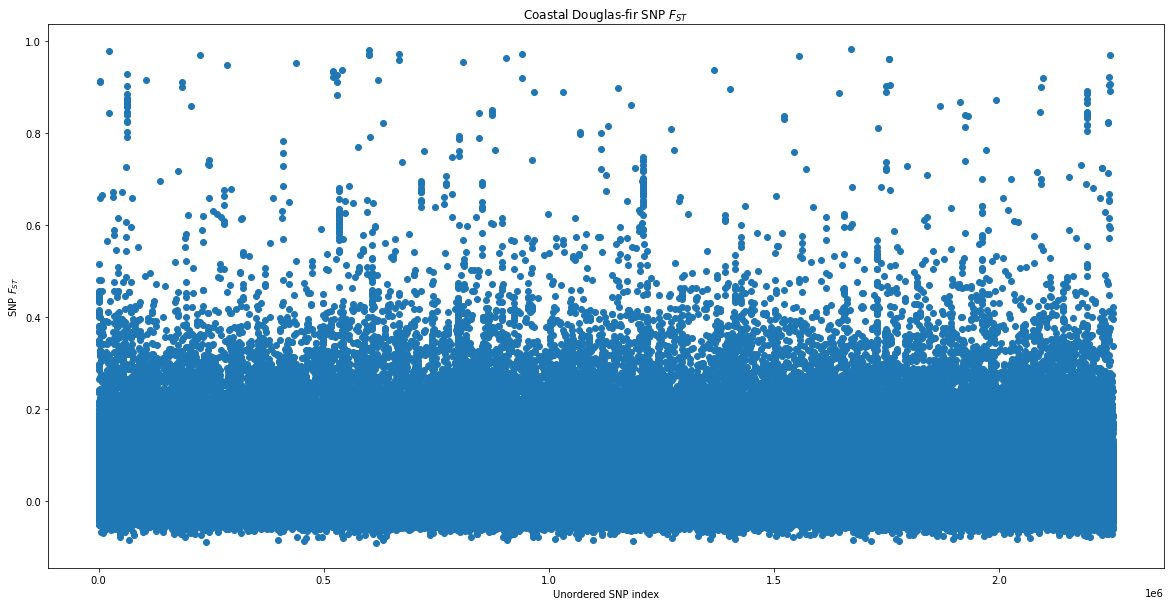

In [13]:
plt.figure(figsize=(20,10))
plt.scatter([i for i in range(len(fsts))], fsts)
plt.title('Coastal Douglas-fir SNP $F_{ST}$')
plt.ylabel('SNP $F_{ST}$')
plt.xlabel('Unordered SNP index')
plt.show()

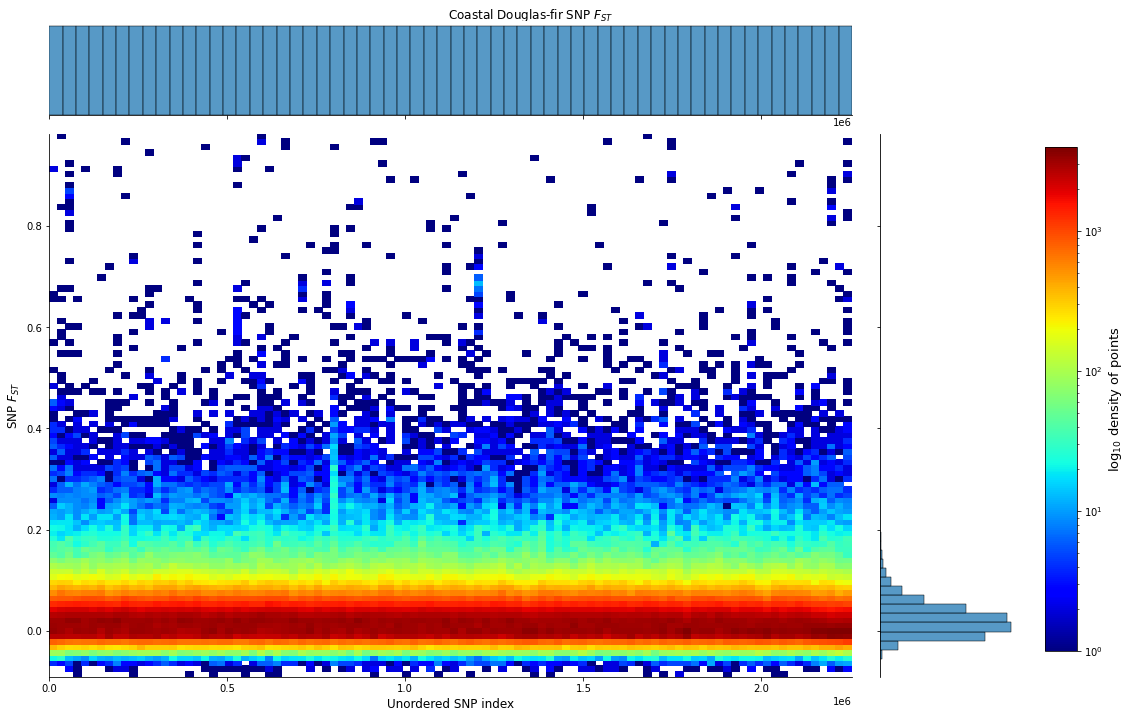

In [14]:
makesweetgraph([i for i in range(len(fsts))], fsts, title='Coastal Douglas-fir SNP $F_{ST}$',
               xlab='Unordered SNP index', ylab='SNP $F_{ST}$', figsize=(15,10))

In [15]:
# get snp ids
gfile = parallel_read(op.join(baydir, 'coastal_all_snps_ADP-lt-1000_gfile_HEADERIDX.txt'),
                      lview=lview,
                      verbose=False,
                      reset_index=False,
                      **dict(index_col=0))
coast_loci = gfile.index.tolist()
gfile.head()


Watching 56 parallel_read() jobs ...


coastal_all_snps_ADP-lt-1000_gfile_HEADERIDX.txt: 100%|██████████| 56/56 [00:05<00:00, 10.31it/s]


,DF_p1-major,DF_p1-minor,DF_p2-major,DF_p2-minor,DF_p23-major,DF_p23-minor,DF_p24-major,DF_p24-minor,DF_p25-major,DF_p25-minor,DF_p26-major,DF_p26-minor,DF_p27-major,DF_p27-minor,DF_p28-major,DF_p28-minor,DF_p10-major,DF_p10-minor,DF_p29-major,DF_p29-minor,DF_p30-major,DF_p30-minor,DF_p31-major,DF_p31-minor,DF_p32-major,DF_p32-minor,DF_p11-major,DF_p11-minor,DF_p12-major,DF_p12-minor,DF_p50-major,DF_p50-minor,DF_p51-major,DF_p51-minor,DF_p52-major,DF_p52-minor,DF_p53-major,DF_p53-minor,DF_p13-major,DF_p13-minor,DF_p6-major,DF_p6-minor,DF_p72-major,DF_p72-minor,DF_p14-major,DF_p14-minor,DF_p73-major,DF_p73-minor,DF_p74-major,DF_p74-minor,DF_p75-major,DF_p75-minor,DF_p76-major,DF_p76-minor,DF_p77-major,DF_p77-minor,DF_p78-major,DF_p78-minor,DF_p79-major,DF_p79-minor,DF_p80-major,DF_p80-minor,DF_p81-major,DF_p81-minor,DF_p15-major,DF_p15-minor,DF_p82-major,DF_p82-minor,DF_p83-major,DF_p83-minor,DF_p84-major,DF_p84-minor,DF_p16-major,DF_p16-minor,DF_p17-major,DF_p17-minor
jcf7190000000000-77738,12,5,0,0,0,0,8,3,8,7,7,3,8,7,0,0,8,7,10,12,11,7,7,6,7,4,11,1,10,2,0,0,0,0,20,3,12,2,9,7,0,0,23,1,10,4,12,1,8,9,0,0,6,10,9,6,12,2,0,0,9,9,9,4,6,3,8,6,20,4,8,1,6,6,8,3
jcf7190000000000-77764,12,4,0,0,0,0,11,2,9,6,8,1,6,7,9,0,10,5,15,7,10,4,10,4,9,3,11,1,12,1,7,4,0,0,23,0,9,0,8,6,0,0,21,2,11,3,14,1,6,7,13,3,8,7,12,4,15,1,0,0,10,3,9,4,0,0,6,4,18,3,7,1,7,4,10,2
jcf7190000000004-54418,35,12,12,8,23,8,33,10,28,14,28,13,25,11,24,15,27,10,29,14,28,11,18,15,22,20,21,19,21,21,28,10,29,7,23,17,0,0,30,12,19,9,36,18,13,14,21,12,0,0,26,10,31,11,24,13,33,24,24,18,35,15,26,13,25,13,32,21,28,26,13,8,30,14,0,0
jcf7190000000004-54508,62,3,30,2,37,7,58,7,0,0,51,0,49,3,35,2,0,0,0,0,52,4,44,1,46,3,58,3,66,0,48,10,43,11,65,0,50,0,56,1,41,1,0,0,35,14,43,11,32,1,55,10,65,2,66,2,0,0,52,4,73,2,46,12,39,3,0,0,67,4,26,1,64,3,25,3
jcf7190000000004-54540,50,17,25,11,0,0,43,24,45,25,31,24,38,18,29,9,39,17,49,21,37,21,21,23,37,10,41,22,50,19,35,15,40,10,35,33,23,31,35,17,27,26,53,20,40,17,51,16,24,16,32,37,46,22,40,32,50,26,37,25,58,18,38,16,35,15,55,21,43,34,0,0,45,22,0,0


In [16]:
fst_df = pd.DataFrame(dict(snp_id=coast_loci, fst_val=fsts))
fst_df.head()

,snp_id,fst_val
0,jcf7190000000000-77738,0.037652
1,jcf7190000000000-77764,0.036842
2,jcf7190000000004-54418,-0.010132
3,jcf7190000000004-54508,0.042764
4,jcf7190000000004-54540,0.008361


In [17]:
baydir

'/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/coastal_variety_with-p6/03_maf-p05_RD-recalculated_FDC/baypass'

In [18]:
# save
fst_df.to_csv(op.join(fstdir, 'coastal_fst.txt'), sep='\t', index=False)

print(fstdir)
ls(fstdir)

/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/coastal_variety_with-p6/03_maf-p05_RD-recalculated_FDC/fst


['coastal_fst.txt']

## interior

In [ ]:
i_baydir = '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/interior_variety_without-p6/03_maf-p05_RD-recalculated_FDI/baypass'
i_fstdir = makedir(op.join(op.dirname(i_baydir), 'fst'))

In [11]:
%%R
# load baypass files created in yeaman03:/notebooks/002_doug_fir_gea/02_baypass
# these have already been appropriately filtered, so I'm not doing any filtering with the `genobaypass2pooldata` call
i_baydir <- '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/interior_variety_without-p6/03_maf-p05_RD-recalculated_FDI/baypass'
i_pooldata <- genobaypass2pooldata(genobaypass.file = paste(i_baydir, 'interior_all_snps_ADP-lt-1000_gfile_noheaderidx.txt', sep='/'),
                                   poolsize.file = paste(i_baydir, 'interior_poolsizefile_noheaderidx.txt', sep='/'),
                                   poolnames = names(read.csv(paste(i_baydir, 'interior_poolsizefile_HEADERIDX.txt', sep='/'), sep='\t')),
                                   min.cov.per.pool = -1,
                                   max.cov.per.pool = 1e+06,
                                   min.maf = -1,
                                   nlines.per.readblock = 3e+06)
saveRDS(i_pooldata, paste0(dirname(i_baydir), '/fst/interior_poolfstat.RDS'))

2.4833820000000002004 millions lines processed in 1.6499999999999999112  min.;  2483382 SNPs found
Data consists of 2483382 SNPs for 35 Pools


In [20]:
%%R
# calculate FSTs
i_res.fst = computeFST(i_pooldata)

In [21]:
%%R
# global FST
i_res.fst$FST

[1] 0.029925644976344790982


In [22]:
# pull FSTs from R into python
i_fsts = r('i_res.fst$snp.FST')

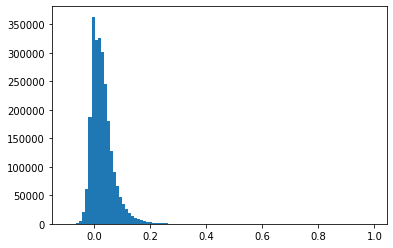

In [23]:
plt.hist(i_fsts, bins=100)
plt.show()

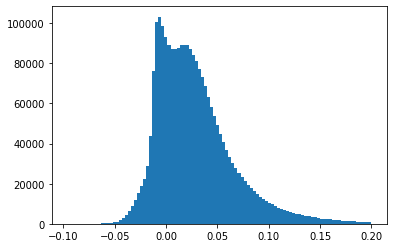

In [24]:
plt.hist([x for x in i_fsts if x < 0.2], bins=100)
plt.show()

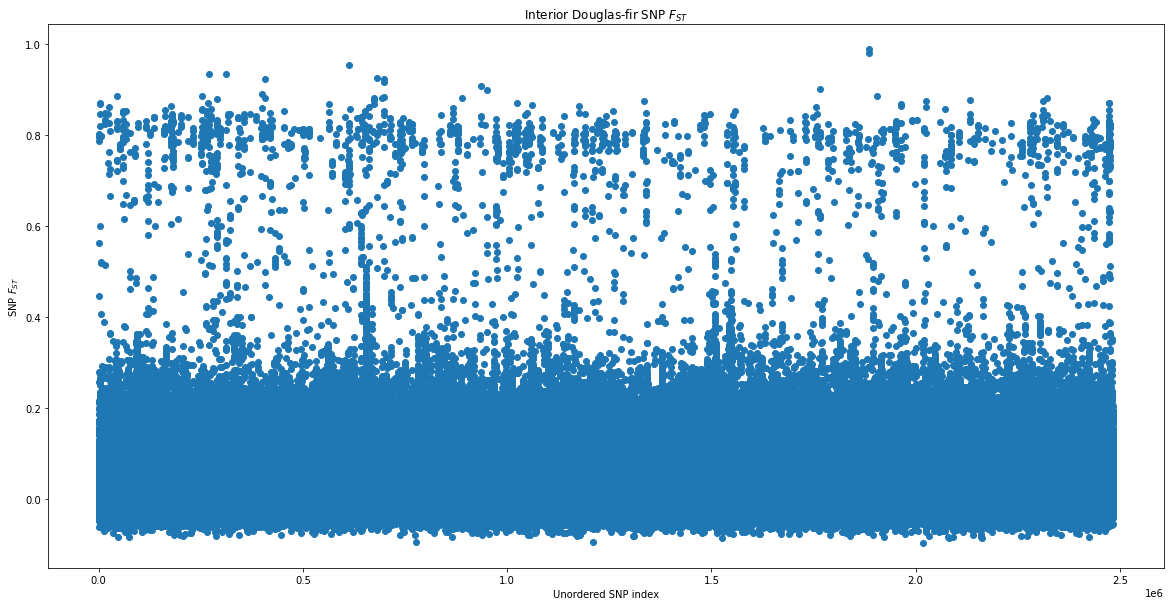

In [25]:
plt.figure(figsize=(20,10))
plt.scatter([i for i in range(len(i_fsts))], i_fsts)
plt.title('Interior Douglas-fir SNP $F_{ST}$')
plt.ylabel('SNP $F_{ST}$')
plt.xlabel('Unordered SNP index')
plt.show()

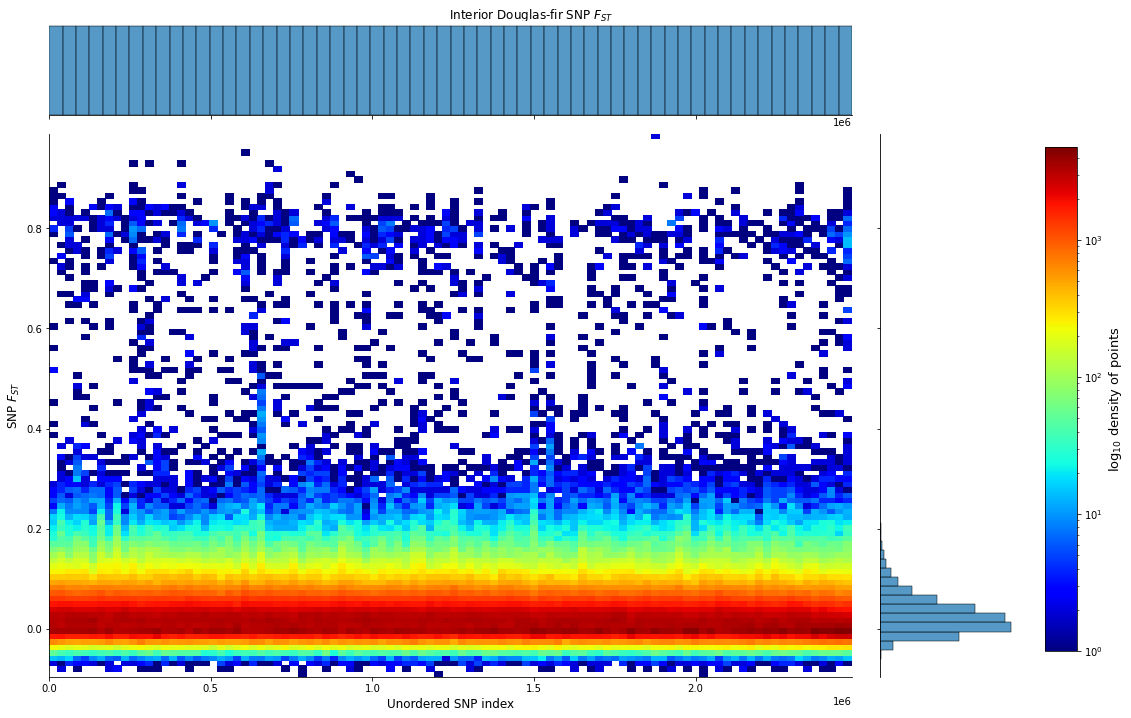

In [26]:
makesweetgraph([i for i in range(len(i_fsts))], i_fsts, title='Interior Douglas-fir SNP $F_{ST}$',
               xlab='Unordered SNP index', ylab='SNP $F_{ST}$', figsize=(15,10))

In [27]:
# get snp ids
gfile = parallel_read(op.join(i_baydir, 'interior_all_snps_ADP-lt-1000_gfile_HEADERIDX.txt'),
                      lview=lview,
                      verbose=False,
                      reset_index=False,
                      **dict(index_col=0))
interior_loci = gfile.index.tolist()
gfile.head()


Watching 56 parallel_read() jobs ...


interior_all_snps_ADP-lt-1000_gfile_HEADERIDX.txt: 100%|██████████| 56/56 [00:03<00:00, 15.05it/s]


,DF_p18-major,DF_p18-minor,DF_p19-major,DF_p19-minor,DF_p20-major,DF_p20-minor,DF_p3-major,DF_p3-minor,DF_p33-major,DF_p33-minor,DF_p34-major,DF_p34-minor,DF_p35-major,DF_p35-minor,DF_p36-major,DF_p36-minor,DF_p37-major,DF_p37-minor,DF_p38-major,DF_p38-minor,DF_p39-major,DF_p39-minor,DF_p4-major,DF_p4-minor,DF_p40-major,DF_p40-minor,DF_p41-major,DF_p41-minor,DF_p42-major,DF_p42-minor,DF_p43-major,DF_p43-minor,DF_p44-major,DF_p44-minor,DF_p45-major,DF_p45-minor,DF_p46-major,DF_p46-minor,DF_p47-major,DF_p47-minor,DF_p48-major,DF_p48-minor,DF_p49-major,DF_p49-minor,DF_p5-major,DF_p5-minor,DF_p54-major,DF_p54-minor,DF_p55-major,DF_p55-minor,DF_p56-major,DF_p56-minor,DF_p57-major,DF_p57-minor,DF_p58-major,DF_p58-minor,DF_p59-major,DF_p59-minor,DF_p60-major,DF_p60-minor,DF_p61-major,DF_p61-minor,DF_p62-major,DF_p62-minor,DF_p7-major,DF_p7-minor,DF_p8-major,DF_p8-minor,DF_p9-major,DF_p9-minor
jcf7190000000000-77657,35,8,28,6,0,0,16,4,10,1,19,5,9,4,14,2,7,4,20,4,21,2,10,2,0,0,8,6,7,2,15,8,16,5,15,2,15,6,0,0,9,2,14,0,21,4,22,3,13,4,8,2,16,4,9,4,10,1,16,6,22,8,17,2,16,2,19,2,12,5
jcf7190000000000-77738,24,8,25,2,0,0,16,2,7,2,12,6,6,2,11,2,9,1,15,2,10,2,9,2,0,0,6,5,6,3,10,7,10,5,11,4,6,2,0,0,7,3,11,0,15,3,15,5,9,3,6,4,12,1,11,3,9,3,15,2,13,4,13,1,14,3,14,0,0,0
jcf7190000000000-77764,26,3,21,0,0,0,14,0,11,0,18,0,11,0,9,0,0,0,13,1,12,1,11,0,0,0,8,1,7,2,10,6,14,2,11,1,0,0,0,0,7,1,9,0,14,0,16,0,10,2,12,0,11,0,15,1,10,2,12,0,14,2,14,0,11,2,11,0,10,0
jcf7190000000004-54349,14,8,16,6,9,3,0,0,16,5,16,6,16,10,10,5,7,9,15,2,7,7,8,9,0,0,0,0,6,7,6,4,11,9,13,9,7,6,17,7,9,10,6,12,7,10,10,4,14,8,12,11,9,8,12,14,7,17,19,8,9,5,8,12,10,13,7,11,0,0
jcf7190000000004-54418,23,16,24,14,14,5,22,14,21,13,27,21,29,15,18,8,9,12,31,8,9,8,17,13,0,0,9,13,12,9,19,16,22,16,8,25,21,14,23,24,17,18,14,15,18,21,32,11,20,14,19,15,12,22,0,0,12,17,21,20,12,20,18,19,19,19,12,9,23,17


In [28]:
i_fst_df = pd.DataFrame(dict(snp_id=interior_loci, fst_val=i_fsts))
i_fst_df.head()

,snp_id,fst_val
0,jcf7190000000000-77657,-0.022227
1,jcf7190000000000-77738,-0.014578
2,jcf7190000000000-77764,0.034109
3,jcf7190000000004-54349,0.013217
4,jcf7190000000004-54418,0.010159


In [29]:
i_baydir

'/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/interior_variety_without-p6/03_maf-p05_RD-recalculated_FDI/baypass'

In [30]:
# save
i_fst_df.to_csv(op.join(i_fstdir, 'interior_fst.txt'), sep='\t', index=False)

print(i_fstdir)
ls(i_fstdir)

/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/interior_variety_without-p6/03_maf-p05_RD-recalculated_FDI/fst


['interior_fst.txt']

## all variety

#### I didn't run baypass on the combined data, so I need to create a gfile

do so by applying ADP cutoff and generating genofile using chunks of the snpfile read in parallel using `parallel_read`

In [56]:
# from yeaman03:/notebooks/002_doug_fir_gea/02_baypass/002_01_DF_pooled_GEA_coastal_kickoff.ipynb
# modified to take in df as arg (also removed `loci` arg)
def get_counts(reduced, numpops=0):
    """Create gfile for baypass.
    
    Get read counts for global major and minor allele. Missing data = 0."""
    import pandas
    from collections import OrderedDict
    import tqdm
    
    loci = reduced.index.tolist()  # added to replace loci arg
    
    pops = [col.replace(".FREQ","") for col in reduced.columns if '.FREQ' in col]
    assert len(pops) == numpops
    read_counts = OrderedDict()
    for locus in tqdm.tqdm(loci):
        if reduced.loc[locus, 'AF'] > 0.5:
            refismajor = False
            majortag = 'AD'
            minortag = 'RD'
        else:
            refismajor = True
            majortag = 'RD'
            minortag = 'AD'
        if refismajor is True:
#             print('checking ', locus)
            # double check that it matches MAF calculation
            assert reduced.loc[locus, 'AF'] == reduced.loc[locus, 'MAF']
        for pop in pops:
            for which,tag in zip(['major','minor'],[majortag, minortag]):
                newcol = "%s-%s" % (pop,which)
                if newcol not in read_counts:
                    read_counts[newcol] = OrderedDict()
                if reduced.loc[locus, f"{pop}.FREQ"] != reduced.loc[locus, f"{pop}.FREQ"]:
                    # if locus was filtered for this pop
                    read_counts[newcol][locus] = 0
                else:
                    try:
                        read_counts[newcol][locus] = int(reduced.loc[locus, "%s.%s" % (pop, tag)])
                    except ValueError as e:
                        # missing data - probably don't need this try statement when first looking at FREQ
                        read_counts[newcol][locus] = 0
    return pandas.DataFrame(read_counts)

In [57]:
def reduce_df(df):
    df = df[df['ADP'] < 1000].copy()
    df.index = df['locus'].tolist()
    
    important_cols = [col for col in df.columns if '.FREQ' in col]
    important_cols.extend([col for col in df.columns if 'AD' in col or 'RD' in col])
    important_cols.extend(['AF', 'MAF'])
    
    return df[important_cols]

In [58]:
fundict = create_fundict(reduce_df)
fundict.update(create_fundict(get_counts, kwargs=dict(numpops=73)))
fundict

OrderedDict([('reduce_df',
              {'reduce_df': <function __main__.reduce_df(df)>,
               'args': {},
               'kwargs': {}}),
             ('get_counts',
              {'get_counts': <function __main__.get_counts(reduced, numpops=0)>,
               'args': {},
               'kwargs': {'numpops': 73}})])

In [12]:
# get genofile in parallel
snpdir = '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/combined_varieties/03_maf-p05_RD-recalculated_both'
f = op.join(snpdir, 'DF_pooled-varscan_all_bedfiles_SNP_both-varieties_maf_RD-recalculated.txt')
assert op.exists(f)
snps = parallel_read(f,
                     lview=lview,
                     dview=dview,
                     verbose=False,
                     assert_rowcount=False,
                     reset_index=False,
                     functions=fundict)
print(snps.shape)
snps.head()


Watching 56 parallel_read() jobs ...


DF_pooled-varscan_all_bedfiles_SNP_both-varieties_maf_RD-recalculated.txt: 100%|██████████| 56/56 [07:16<00:00,  7.80s/it]  


(2767500, 146)


,DF_p1-major,DF_p1-minor,DF_p18-major,DF_p18-minor,DF_p19-major,DF_p19-minor,DF_p2-major,DF_p2-minor,DF_p20-major,DF_p20-minor,DF_p23-major,DF_p23-minor,DF_p24-major,DF_p24-minor,DF_p25-major,DF_p25-minor,DF_p26-major,DF_p26-minor,DF_p27-major,DF_p27-minor,DF_p28-major,DF_p28-minor,DF_p10-major,DF_p10-minor,DF_p29-major,DF_p29-minor,DF_p3-major,DF_p3-minor,DF_p30-major,DF_p30-minor,DF_p31-major,DF_p31-minor,DF_p32-major,DF_p32-minor,DF_p33-major,DF_p33-minor,DF_p34-major,DF_p34-minor,DF_p35-major,DF_p35-minor,DF_p36-major,DF_p36-minor,DF_p37-major,DF_p37-minor,DF_p11-major,DF_p11-minor,DF_p38-major,DF_p38-minor,DF_p39-major,DF_p39-minor,...,DF_p59-major,DF_p59-minor,DF_p6-major,DF_p6-minor,DF_p60-major,DF_p60-minor,DF_p61-major,DF_p61-minor,DF_p62-major,DF_p62-minor,DF_p7-major,DF_p7-minor,DF_p72-major,DF_p72-minor,DF_p14-major,DF_p14-minor,DF_p73-major,DF_p73-minor,DF_p74-major,DF_p74-minor,DF_p75-major,DF_p75-minor,DF_p76-major,DF_p76-minor,DF_p77-major,DF_p77-minor,DF_p78-major,DF_p78-minor,DF_p79-major,DF_p79-minor,DF_p8-major,DF_p8-minor,DF_p80-major,DF_p80-minor,DF_p81-major,DF_p81-minor,DF_p15-major,DF_p15-minor,DF_p82-major,DF_p82-minor,DF_p83-major,DF_p83-minor,DF_p84-major,DF_p84-minor,DF_p9-major,DF_p9-minor,DF_p16-major,DF_p16-minor,DF_p17-major,DF_p17-minor
jcf7190000000000-77657,0,0,35,8,28,6,0,0,0,0,7,2,11,4,7,10,9,3,8,7,0,0,13,10,8,18,16,4,12,10,6,5,8,9,10,1,19,5,9,4,14,2,7,4,7,2,20,4,21,2,...,10,1,0,0,16,6,22,8,17,2,16,2,18,9,6,6,12,3,6,11,13,7,0,0,0,0,9,5,0,0,19,2,9,10,0,0,6,4,9,8,11,7,6,3,12,5,0,0,0,0
jcf7190000000000-77738,12,5,24,8,25,2,0,0,0,0,0,0,8,3,8,7,7,3,8,7,0,0,8,7,10,12,16,2,11,7,7,6,7,4,7,2,12,6,6,2,11,2,9,1,11,1,15,2,10,2,...,9,3,0,0,15,2,13,4,13,1,14,3,23,1,10,4,12,1,8,9,0,0,6,10,9,6,12,2,0,0,14,0,9,9,9,4,6,3,8,6,20,4,8,1,0,0,6,6,8,3
jcf7190000000000-77764,12,4,26,3,21,0,0,0,0,0,0,0,11,2,9,6,8,1,6,7,9,0,10,5,15,7,14,0,10,4,10,4,9,3,11,0,18,0,11,0,9,0,0,0,11,1,13,1,12,1,...,10,2,0,0,12,0,14,2,14,0,11,2,21,2,11,3,14,1,6,7,13,3,8,7,12,4,15,1,0,0,11,0,10,3,9,4,0,0,6,4,18,3,7,1,10,0,7,4,10,2
jcf7190000000004-54418,35,12,16,23,14,24,12,8,5,14,23,8,33,10,28,14,28,13,25,11,24,15,27,10,29,14,14,22,28,11,18,15,22,20,13,21,21,27,15,29,8,18,12,9,21,19,8,31,8,9,...,17,12,19,9,20,21,20,12,19,18,19,19,36,18,13,14,21,12,0,0,26,10,31,11,24,13,33,24,24,18,9,12,35,15,26,13,25,13,32,21,28,26,13,8,17,23,30,14,0,0
jcf7190000000004-54505,70,0,39,9,53,10,30,0,0,0,40,0,66,0,65,0,54,0,51,0,35,0,49,0,67,0,41,9,58,0,40,4,46,0,46,7,48,12,46,11,0,0,17,13,59,0,61,0,28,3,...,23,18,40,0,54,9,39,10,40,23,0,0,72,0,49,0,53,0,34,0,0,0,67,0,63,0,68,0,57,0,0,0,72,0,55,0,42,0,65,0,72,0,28,0,52,1,67,0,27,0


In [16]:
# save for later
comb_baydir = makedir(op.join(snpdir, 'baypass'))

snps.to_csv(op.join(comb_baydir, 'both-varieties_all_snps_ADP-lt-1000_gfile_HEADERIDX.txt'),
            index=True, header=True, sep='\t')
snps.to_csv(op.join(comb_baydir, 'both-varieties_all_snps_ADP-lt-1000_gfile_noheaderidx.txt'),
            index=False, header=False, sep='\t')

In [17]:
comb_baydir

'/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/combined_varieties/03_maf-p05_RD-recalculated_both/baypass'

In [25]:
# make a poolsizefile
all_ploidy = pklload('/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/pkl_files/ploidy.pkl')['DF_pooled']
pops = [col.replace("-major","") for col in snps.columns if '-major' in col]
print(len(pops))

vals = OrderedDict()
for pop in pops:
    vals[pop] = OrderedDict()
    vals[pop][0] = all_ploidy[pop]
poolsizefile = pd.DataFrame(vals)

# save, no need to name as 'neutral'
poolsizefile.to_csv(op.join(comb_baydir, 'combined_poolsizefile_HEADERIDX.txt'), sep='\t', index=False)
poolsizefile.to_csv(op.join(comb_baydir, 'combined_poolsizefile_noheaderidx.txt'), sep='\t', index=False, header=False)

poolsizefile

73


,DF_p1,DF_p18,DF_p19,DF_p2,DF_p20,DF_p23,DF_p24,DF_p25,DF_p26,DF_p27,DF_p28,DF_p10,DF_p29,DF_p3,DF_p30,DF_p31,DF_p32,DF_p33,DF_p34,DF_p35,DF_p36,DF_p37,DF_p11,DF_p38,DF_p39,DF_p4,DF_p40,DF_p41,DF_p42,DF_p43,DF_p44,DF_p45,DF_p46,DF_p12,DF_p47,DF_p48,DF_p49,DF_p5,DF_p50,DF_p51,DF_p52,DF_p53,DF_p54,DF_p55,DF_p13,DF_p56,DF_p57,DF_p58,DF_p59,DF_p6,DF_p60,DF_p61,DF_p62,DF_p7,DF_p72,DF_p14,DF_p73,DF_p74,DF_p75,DF_p76,DF_p77,DF_p78,DF_p79,DF_p8,DF_p80,DF_p81,DF_p15,DF_p82,DF_p83,DF_p84,DF_p9,DF_p16,DF_p17
0,80,80,80,80,80,80,80,80,76,80,80,80,78,80,80,80,80,80,78,80,80,74,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,80,70,80,80,80,80,76,74,80,80,78,80,80,80,80,80,80,80,80,80,80,80,80,66,80,80,78,80,78,80,80,80


#### now calculate FST

In [12]:
%%R
# load baypass files created above
# these have already been appropriately filtered, so I'm not doing any filtering with the `genobaypass2pooldata` call
comb_baydir <- '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/combined_varieties/03_maf-p05_RD-recalculated_both/baypass'
comb_pooldata <- genobaypass2pooldata(genobaypass.file = paste0(comb_baydir, '/both-varieties_all_snps_ADP-lt-1000_gfile_noheaderidx.txt'),
                                      poolsize.file = paste0(comb_baydir, '/combined_poolsizefile_noheaderidx.txt'),
                                      poolnames = names(read.csv(paste0(comb_baydir, '/combined_poolsizefile_HEADERIDX.txt'), sep='\t')),
                                      min.cov.per.pool = -1,
                                      max.cov.per.pool = 1e+06,
                                      min.maf = -1,
                                      nlines.per.readblock = 3e+06)
saveRDS(comb_pooldata, paste0(dirname(comb_baydir), '/fst/combined-variety_poolfstat.RDS'))

2.7675000000000000711 millions lines processed in 2.8300000000000000711  min.;  2767500 SNPs found
Data consists of 2767500 SNPs for 73 Pools


In [32]:
%%R
# calculate FSTs
comb_res.fst = computeFST(comb_pooldata)

In [33]:
%%R
# global FST
comb_res.fst$FST

[1] 0.10699138436255486995


In [34]:
# pull FSTs from R into python
comb_fsts = r('comb_res.fst$snp.FST')

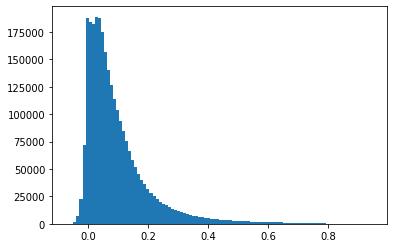

In [35]:
plt.hist(comb_fsts, bins=100)
plt.show()

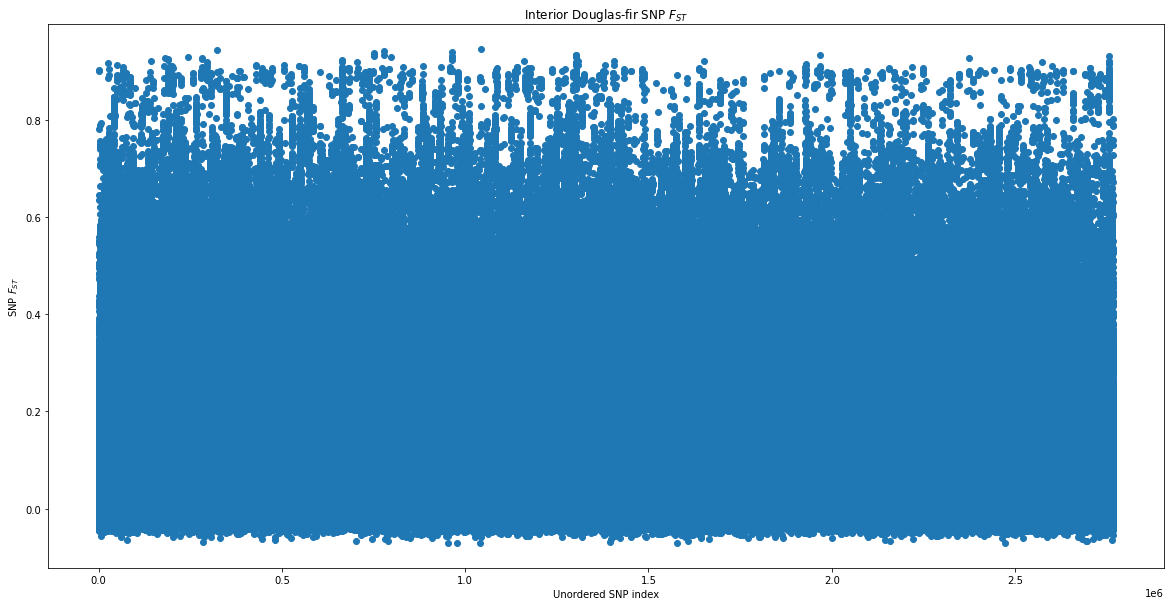

In [36]:
plt.figure(figsize=(20,10))
plt.scatter([i for i in range(len(comb_fsts))], comb_fsts)
plt.title('Interior Douglas-fir SNP $F_{ST}$')
plt.ylabel('SNP $F_{ST}$')
plt.xlabel('Unordered SNP index')
plt.show()
             

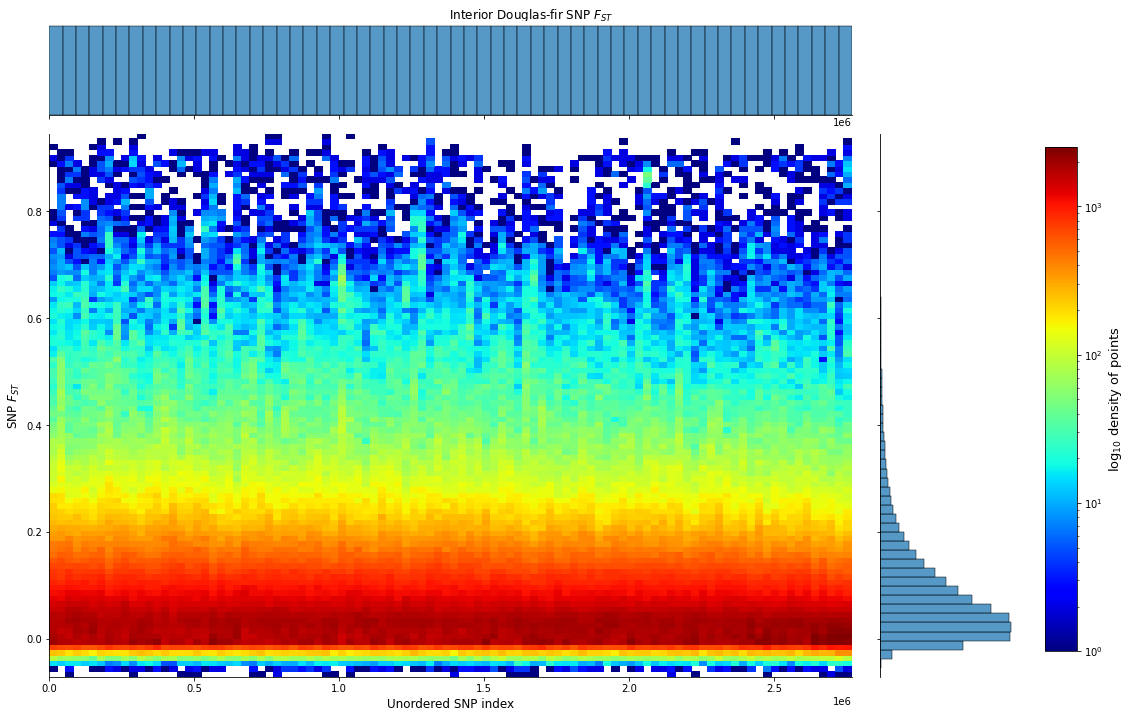

In [37]:
makesweetgraph([i for i in range(len(comb_fsts))], comb_fsts, title='Interior Douglas-fir SNP $F_{ST}$',
               xlab='Unordered SNP index', ylab='SNP $F_{ST}$', figsize=(15,10))

In [38]:
max(comb_fsts)

0.9456949098700226

In [39]:
# get snp ids
comb_baydir = r('comb_baydir').r_repr().replace('"', '')
gfile = parallel_read(op.join(comb_baydir, 'both-varieties_all_snps_ADP-lt-1000_gfile_HEADERIDX.txt'),
                      lview=lview,
                      verbose=False,
                      reset_index=False,
                      **dict(index_col=0))
comb_loci = gfile.index.tolist()
gfile.head()


Watching 56 parallel_read() jobs ...


both-varieties_all_snps_ADP-lt-1000_gfile_HEADERIDX.txt: 100%|██████████| 56/56 [00:08<00:00,  6.80it/s]


,DF_p1-major,DF_p1-minor,DF_p18-major,DF_p18-minor,DF_p19-major,DF_p19-minor,DF_p2-major,DF_p2-minor,DF_p20-major,DF_p20-minor,DF_p23-major,DF_p23-minor,DF_p24-major,DF_p24-minor,DF_p25-major,DF_p25-minor,DF_p26-major,DF_p26-minor,DF_p27-major,DF_p27-minor,DF_p28-major,DF_p28-minor,DF_p10-major,DF_p10-minor,DF_p29-major,DF_p29-minor,DF_p3-major,DF_p3-minor,DF_p30-major,DF_p30-minor,DF_p31-major,DF_p31-minor,DF_p32-major,DF_p32-minor,DF_p33-major,DF_p33-minor,DF_p34-major,DF_p34-minor,DF_p35-major,DF_p35-minor,DF_p36-major,DF_p36-minor,DF_p37-major,DF_p37-minor,DF_p11-major,DF_p11-minor,DF_p38-major,DF_p38-minor,DF_p39-major,DF_p39-minor,...,DF_p59-major,DF_p59-minor,DF_p6-major,DF_p6-minor,DF_p60-major,DF_p60-minor,DF_p61-major,DF_p61-minor,DF_p62-major,DF_p62-minor,DF_p7-major,DF_p7-minor,DF_p72-major,DF_p72-minor,DF_p14-major,DF_p14-minor,DF_p73-major,DF_p73-minor,DF_p74-major,DF_p74-minor,DF_p75-major,DF_p75-minor,DF_p76-major,DF_p76-minor,DF_p77-major,DF_p77-minor,DF_p78-major,DF_p78-minor,DF_p79-major,DF_p79-minor,DF_p8-major,DF_p8-minor,DF_p80-major,DF_p80-minor,DF_p81-major,DF_p81-minor,DF_p15-major,DF_p15-minor,DF_p82-major,DF_p82-minor,DF_p83-major,DF_p83-minor,DF_p84-major,DF_p84-minor,DF_p9-major,DF_p9-minor,DF_p16-major,DF_p16-minor,DF_p17-major,DF_p17-minor
jcf7190000000000-77657,0,0,35,8,28,6,0,0,0,0,7,2,11,4,7,10,9,3,8,7,0,0,13,10,8,18,16,4,12,10,6,5,8,9,10,1,19,5,9,4,14,2,7,4,7,2,20,4,21,2,...,10,1,0,0,16,6,22,8,17,2,16,2,18,9,6,6,12,3,6,11,13,7,0,0,0,0,9,5,0,0,19,2,9,10,0,0,6,4,9,8,11,7,6,3,12,5,0,0,0,0
jcf7190000000000-77738,12,5,24,8,25,2,0,0,0,0,0,0,8,3,8,7,7,3,8,7,0,0,8,7,10,12,16,2,11,7,7,6,7,4,7,2,12,6,6,2,11,2,9,1,11,1,15,2,10,2,...,9,3,0,0,15,2,13,4,13,1,14,3,23,1,10,4,12,1,8,9,0,0,6,10,9,6,12,2,0,0,14,0,9,9,9,4,6,3,8,6,20,4,8,1,0,0,6,6,8,3
jcf7190000000000-77764,12,4,26,3,21,0,0,0,0,0,0,0,11,2,9,6,8,1,6,7,9,0,10,5,15,7,14,0,10,4,10,4,9,3,11,0,18,0,11,0,9,0,0,0,11,1,13,1,12,1,...,10,2,0,0,12,0,14,2,14,0,11,2,21,2,11,3,14,1,6,7,13,3,8,7,12,4,15,1,0,0,11,0,10,3,9,4,0,0,6,4,18,3,7,1,10,0,7,4,10,2
jcf7190000000004-54418,35,12,16,23,14,24,12,8,5,14,23,8,33,10,28,14,28,13,25,11,24,15,27,10,29,14,14,22,28,11,18,15,22,20,13,21,21,27,15,29,8,18,12,9,21,19,8,31,8,9,...,17,12,19,9,20,21,20,12,19,18,19,19,36,18,13,14,21,12,0,0,26,10,31,11,24,13,33,24,24,18,9,12,35,15,26,13,25,13,32,21,28,26,13,8,17,23,30,14,0,0
jcf7190000000004-54505,70,0,39,9,53,10,30,0,0,0,40,0,66,0,65,0,54,0,51,0,35,0,49,0,67,0,41,9,58,0,40,4,46,0,46,7,48,12,46,11,0,0,17,13,59,0,61,0,28,3,...,23,18,40,0,54,9,39,10,40,23,0,0,72,0,49,0,53,0,34,0,0,0,67,0,63,0,68,0,57,0,0,0,72,0,55,0,42,0,65,0,72,0,28,0,52,1,67,0,27,0


In [40]:
comb_fst_df = pd.DataFrame(dict(snp_id=comb_loci, fst_val=comb_fsts))
comb_fst_df.head()

,snp_id,fst_val
0,jcf7190000000000-77657,0.041906
1,jcf7190000000000-77738,0.032613
2,jcf7190000000000-77764,0.083560
3,jcf7190000000004-54418,0.038388
4,jcf7190000000004-54505,0.144608


In [41]:
comb_baydir

'/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/combined_varieties/03_maf-p05_RD-recalculated_both/baypass'

In [42]:
# save
comb_fstdir = makedir(op.join(op.dirname(comb_baydir), 'fst'))

comb_fst_df.to_csv(op.join(comb_fstdir, 'combined_fst.txt'), sep='\t', index=False)

print(comb_fstdir)
ls(comb_fstdir)

/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/combined_varieties/03_maf-p05_RD-recalculated_both/fst


['combined_fst.txt']

In [43]:
len(fsts), len(i_fsts), len(comb_fsts)

(2254011, 2483382, 2767500)

# plot distributions between interesting loci and background

In [2]:
# restart notebook
latest_commit()

##################################################################
Current commit of pythonimports:
commit e9626ace46e74716aa8e80b76ba6467313f81da5
Author: Brandon <lindb@vcu.edu>
Date:   Thu Dec 31 14:17:15 2020 -0700
Today:	January 06, 2021 - 00:12:21
##################################################################



In [3]:
fstdir = '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/coastal_variety_with-p6/03_maf-p05_RD-recalculated_FDC/fst'
i_fstdir = '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/interior_variety_without-p6/03_maf-p05_RD-recalculated_FDI/fst'
comb_fstdir = '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/DF_pooled/snpsANDindels/combined_varieties/03_maf-p05_RD-recalculated_both/fst'
for d in [fstdir, i_fstdir, comb_fstdir]:
    assert op.exists(d)

In [4]:
fst_df = pd.read_table(op.join(fstdir, 'coastal_fst.txt'))
i_fst_df = pd.read_table(op.join(i_fstdir, 'interior_fst.txt'))
comb_fst_df = pd.read_table(op.join(comb_fstdir, 'combined_fst.txt'))
comb_fst_df.head()

,snp_id,fst_val
0,jcf7190000000000-77657,0.041906
1,jcf7190000000000-77738,0.032613
2,jcf7190000000000-77764,0.083560
3,jcf7190000000004-54418,0.038388
4,jcf7190000000004-54505,0.144608


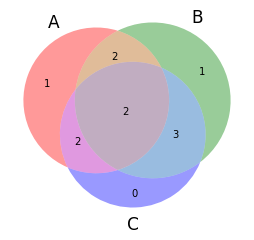

In [5]:
# show that it works
out = venn_diagram([1, 2, 8], [1, 2, 3, 4], [1, 2, 3], set_labels=['A','B','C'])

In [6]:
def explore_fst(fst_thresh=0.7):
    """Explore data with various FST thresholds."""
    data = dict(zip(['coastal', 'interior', 'both'], [fst_df, i_fst_df, comb_fst_df]))
    
    print(ColorText(f'fst_thresh = {fst_thresh}').bold().blue())
        
    # how many SNPs have FST ≥ fst_thesh?
    print(ColorText('\nNumber of FST outliers').bold())
    outliers = {}
    for name,df in data.items():
        df = df[df['fst_val'] >= fst_thresh]
        outliers[name] = df['snp_id'].tolist()
        print('\t', name, len(outliers[name]))
        
    # how many overlap with loci in the LD block?
    print(ColorText('\nNumber of FST outliers that were in the LD block').bold())
    for name,loci in outliers.items():
        overlap = len(set(loci).intersection(clusters.index.tolist()))
        print('\t',
              name,
              overlap,
              "(%s%% of outliers)" % round((overlap/len(loci))*100, 2) )
    
    # what is the overlap among contigs from the LD cluster and those that had at least 1 SNP w/ FST ≥ fst_thesh
    print(ColorText('\nOverlap among contigs with FST outlier(s) and the contigs from the LD cluster').bold())
    contigs = {}
    for name,loci in outliers.items():
        contigs[name] = uni([locus.split("-")[0] for locus in loci])
        overlap = len(set(contigs[name]).intersection(cluster_contigs))
        print('\t',
              name,
              overlap,
              "(%s%% of contigs with outlier(s))" % round((overlap/len(contigs[name]))*100, 2))
    venn_diagram(*values(contigs), set_labels=keys(contigs), title='Overlap of contigs that have FST outlier(s)')
        

    # how much overlap is there?
    print(ColorText('\nOverlap of FST outliers').bold())
    for i,namei in enumerate(outliers.keys()):
        for j,namej in enumerate(outliers.keys()):
            if i < j:
                print('\t', namei, namej, len(set(outliers[namei]).intersection(outliers[namej])))
    
    # plot the venn
    venn_diagram(*values(outliers), set_labels=keys(outliers), title='Overlap of FST outliers')
    
    return contigs, outliers, data

#### look at patterns

In [7]:
# total number of SNPs
for df in [fst_df, i_fst_df, comb_fst_df]:
    print(nrow(df))

2254011
2483382
2767500


In [8]:
# read in the file that has loci with cluster ID from the LD block
clusterfile = '/data/projects/pool_seq/DF_datasets/DF_pooled_GEA/inversion/inversion_clusters.txt'
clusters = pd.read_table(clusterfile, index_col=0)
clusters.head()

,cluster
jcf7190000039135-267535,C1
jcf7190000039135-267314,C1
jcf7190000035280-556781,C1
jcf7190000003929-697010,C1
jcf7190000079941-140377,C1


In [9]:
for name,df in zip(['coastal', 'interior', 'both'], [fst_df, i_fst_df, comb_fst_df]):
    loci = df['snp_id'][df['fst_val'] >= 0.7]
    print(name, len(loci), len(set(loci).intersection(clusters.index.tolist())))

coastal 150 23
interior 1286 1236
both 6349 1146


In [10]:
cluster_contigs = uni([locus.split("-")[0] for locus in clusters.index])
len(cluster_contigs)

616

fst_thresh = 0.6

Number of FST outliers
	 coastal 311
	 interior 1536
	 both 17794

Number of FST outliers that were in the LD block
	 coastal 29 (9.32% of outliers)
	 interior 1410 (91.8% of outliers)
	 both 1198 (6.73% of outliers)

Overlap among contigs with FST outlier(s) and the contigs from the LD cluster
	 coastal 45 (29.41% of contigs with outlier(s))
	 interior 446 (93.11% of contigs with outlier(s))
	 both 433 (16.15% of contigs with outlier(s))


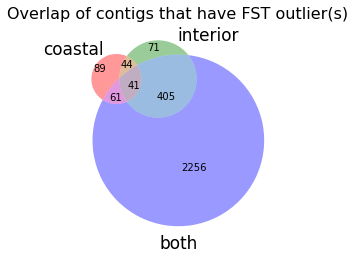


Overlap of FST outliers
	 coastal interior 31
	 coastal both 57
	 interior both 1214


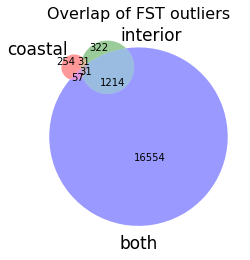

In [12]:
a,b,c = explore_fst(0.6)

fst_thresh = 0.7

Number of FST outliers
	 coastal 150
	 interior 1286
	 both 6349

Number of FST outliers that were in the LD block
	 coastal 23 (15.33% of outliers)
	 interior 1236 (96.11% of outliers)
	 both 1146 (18.05% of outliers)

Overlap among contigs with FST outlier(s) and the contigs from the LD cluster
	 coastal 33 (40.24% of contigs with outlier(s))
	 interior 410 (96.02% of contigs with outlier(s))
	 both 396 (33.62% of contigs with outlier(s))


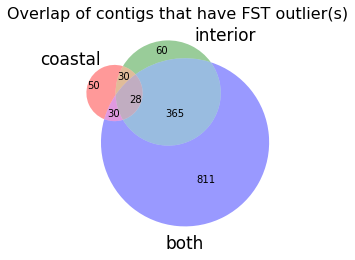


Overlap of FST outliers
	 coastal interior 23
	 coastal both 24
	 interior both 1033


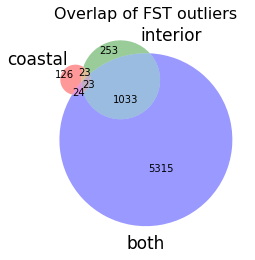

In [13]:
a,b,c = explore_fst(0.7)

fst_thresh = 0.8

Number of FST outliers
	 coastal 96
	 interior 528
	 both 1927

Number of FST outliers that were in the LD block
	 coastal 23 (23.96% of outliers)
	 interior 510 (96.59% of outliers)
	 both 984 (51.06% of outliers)

Overlap among contigs with FST outlier(s) and the contigs from the LD cluster
	 coastal 27 (51.92% of contigs with outlier(s))
	 interior 230 (96.64% of contigs with outlier(s))
	 both 351 (71.05% of contigs with outlier(s))


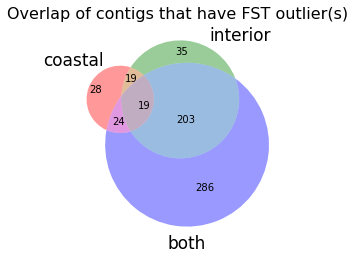


Overlap of FST outliers
	 coastal interior 10
	 coastal both 20
	 interior both 383


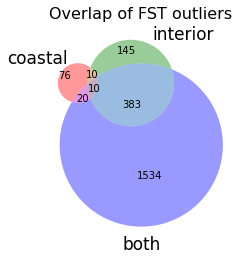

In [14]:
a,b,c = explore_fst(0.8)

fst_thresh = 0.85

Number of FST outliers
	 coastal 66
	 interior 66
	 both 1125

Number of FST outliers that were in the LD block
	 coastal 17 (25.76% of outliers)
	 interior 59 (89.39% of outliers)
	 both 808 (71.82% of outliers)

Overlap among contigs with FST outlier(s) and the contigs from the LD cluster
	 coastal 23 (57.5% of contigs with outlier(s))
	 interior 47 (94.0% of contigs with outlier(s))
	 both 299 (88.99% of contigs with outlier(s))


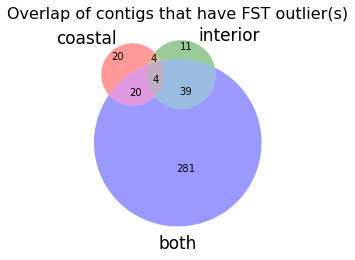


Overlap of FST outliers
	 coastal interior 1
	 coastal both 16
	 interior both 31


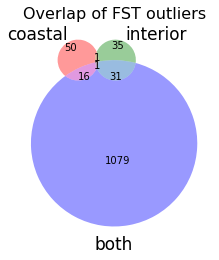

In [15]:
a,b,c = explore_fst(0.85)